Naive testing 

In [1]:
import aeon
from aeon.visualisation import plot_series
from aeon.forecasting.compose import ForecastX
from aeon.forecasting.compose import make_reduction
from aeon.forecasting.var import VAR
from sklearn.ensemble import GradientBoostingRegressor
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.naive import NaiveForecaster
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\songh\AppData\Local\Programs\Python\Python312\Lib\site-packages\aeon\base\__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(


In [2]:
# Load data
df1 = pd.read_csv("D:\Python\demand-prediction\Dataset\SKU5.csv")
df1["date"] = pd.to_datetime(df1["date"])
df1["date"] = pd.DatetimeIndex(df1["date"]).to_period("D")
df1.set_index("date", inplace=True)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\songh\AppData\Local\Temp\ipykernel_20932\1584931713.py:2: SyntaxWarning: invalid escape sequence '\P'
  df1 = pd.read_csv("D:\Python\demand-prediction\Dataset\SKU5.csv")


In [3]:
df1.shape

(1826, 28)

In [4]:
df1.head()
print(df1.shape)
testSize = math.floor(df1.shape[0] * 0.3)
testSize = 275
print(testSize)

(1826, 28)
275


In [5]:
y = df1["sales"]
X = df1[["holiday", "promotion"]]

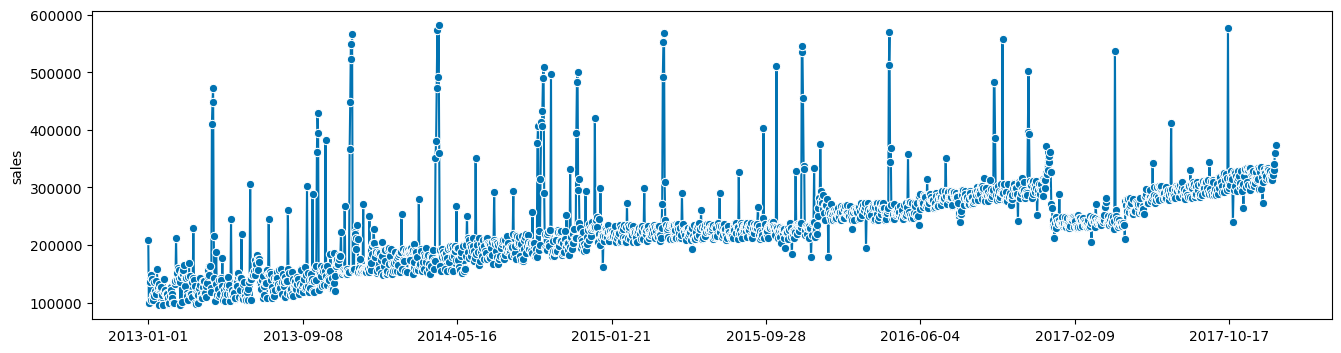

In [6]:
plot_series(y)
plt.show()

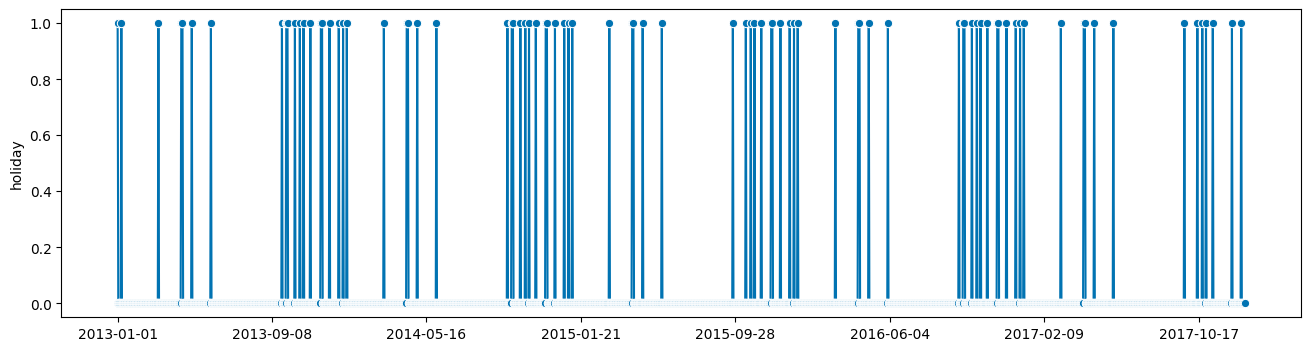

In [7]:
plot_series(X["holiday"])
plt.show()

In [8]:
regressor = GradientBoostingRegressor(max_depth=None)
forecasterTabular = make_reduction(regressor, window_length=30, strategy="recursive")

In [9]:
forecaster = ForecastX(
    forecaster_X=VAR(),
    forecaster_y=forecasterTabular,
)

In [10]:
y_train, y_test = temporal_train_test_split(y, test_size=testSize)
X_train, X_test = temporal_train_test_split(X, test_size=testSize)

In [11]:
fh = np.arange(len(y_test)) + 1

In [12]:
regressor = GradientBoostingRegressor(max_depth=None)
forecasterTabular = make_reduction(regressor, window_length=30, strategy="recursive")

In [13]:
forecaster = ForecastX(
    forecaster_X=VAR(),
    forecaster_y=forecasterTabular,
)

In [14]:
forecaster.fit(y_train, X=X_train, fh=fh)
y_pred = forecaster.predict(fh=fh)

In [15]:
y_train

date
2013-01-01    208779
2013-01-02     99077
2013-01-03    136259
2013-01-04    136213
2013-01-05    147481
               ...  
2017-03-27    245849
2017-03-28    243639
2017-03-29    251667
2017-03-30    265951
2017-03-31    274972
Freq: D, Name: sales, Length: 1551, dtype: int64

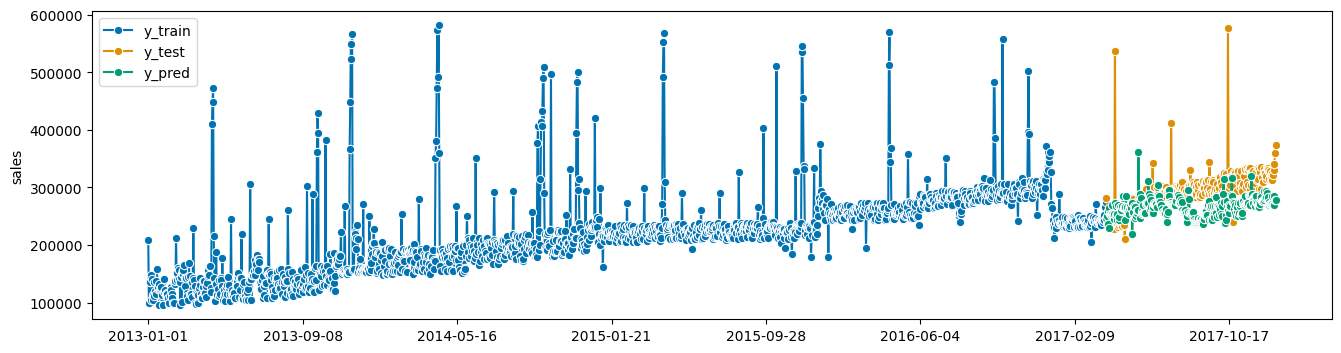

In [16]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [17]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score , mean_squared_error
# Calculate MAE, MAPE, MSE, and R2
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R2: {r2:.4f}")

MAE: 35354.2523
MSE: 2177892383.9662
MAPE: 0.1141
R2: -0.6701


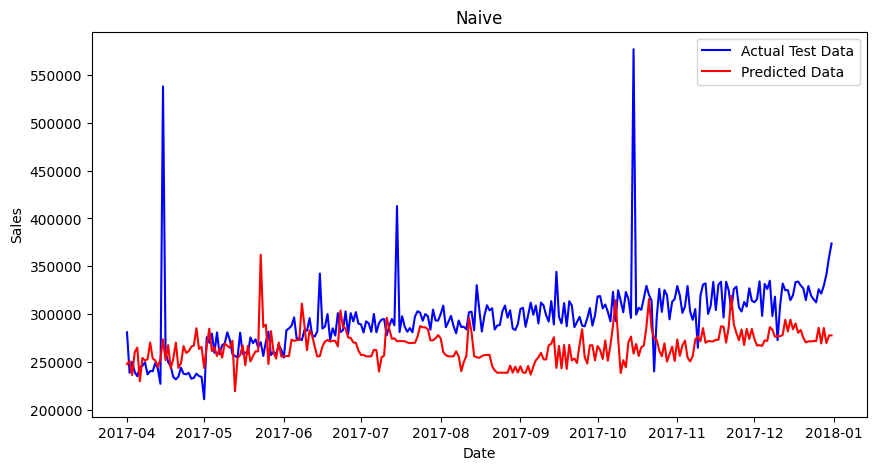

In [18]:
# Plotting Test Set vs. Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test.index.to_timestamp(), y_test, label='Actual Test Data', color='blue')
plt.plot(y_pred.index.to_timestamp(), y_pred, label='Predicted Data', color='red')
plt.title('Naive')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(False)
plt.show()


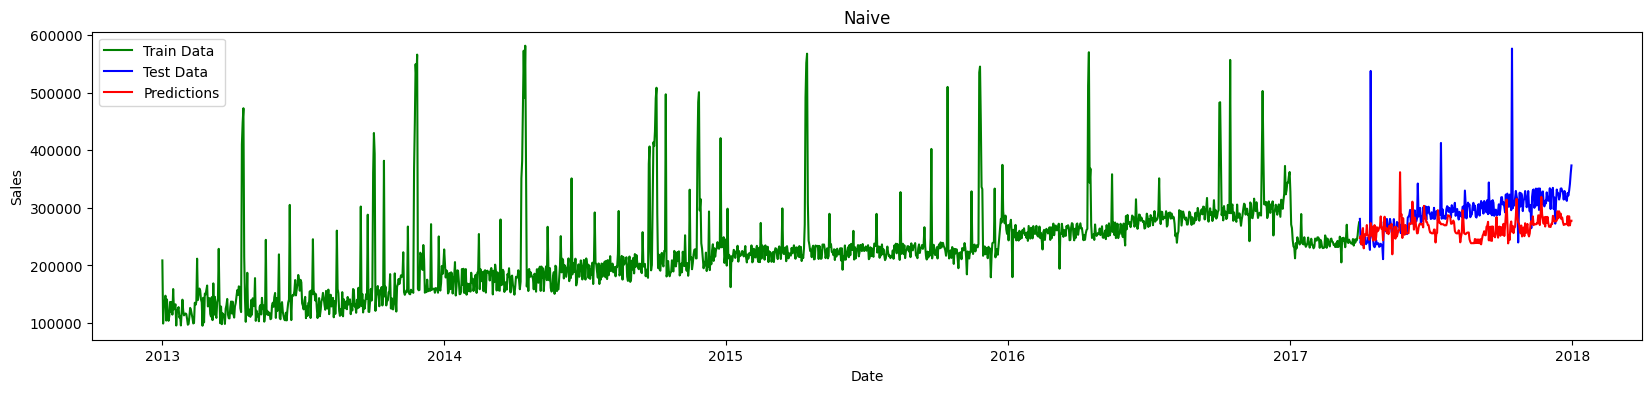

In [19]:
# Plotting Train, Test, and Predictions
plt.figure(figsize=(20, 4))
plt.plot(y_train.index.to_timestamp(), y_train, label='Train Data', color='green')
plt.plot(y_test.index.to_timestamp(), y_test, label='Test Data', color='blue')
plt.plot(y_pred.index.to_timestamp(), y_pred, label='Predictions', color='red')
plt.title('Naive')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(False)
plt.show()


In [20]:
# sps = [i for i in range(testSize)]
# mapeNaive = []
# for sp in sps:
#     forecaster = NaiveForecaster(strategy="last", sp=sp)
#     forecaster.fit(y_train)
#     y_pred = forecaster.predict(fh)
#     plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])    
#     mapeNaive.append(mean_absolute_percentage_error(y_test, y_pred, symmetric=False))

In [21]:
# dfNaive = pd.DataFrame(data=mapeNaive, index=sps)

In [22]:
# dfNaive.describe()

In [23]:
# dfNaive.plot()

In [24]:
# print([mapeNaive])

# Naive no ML

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


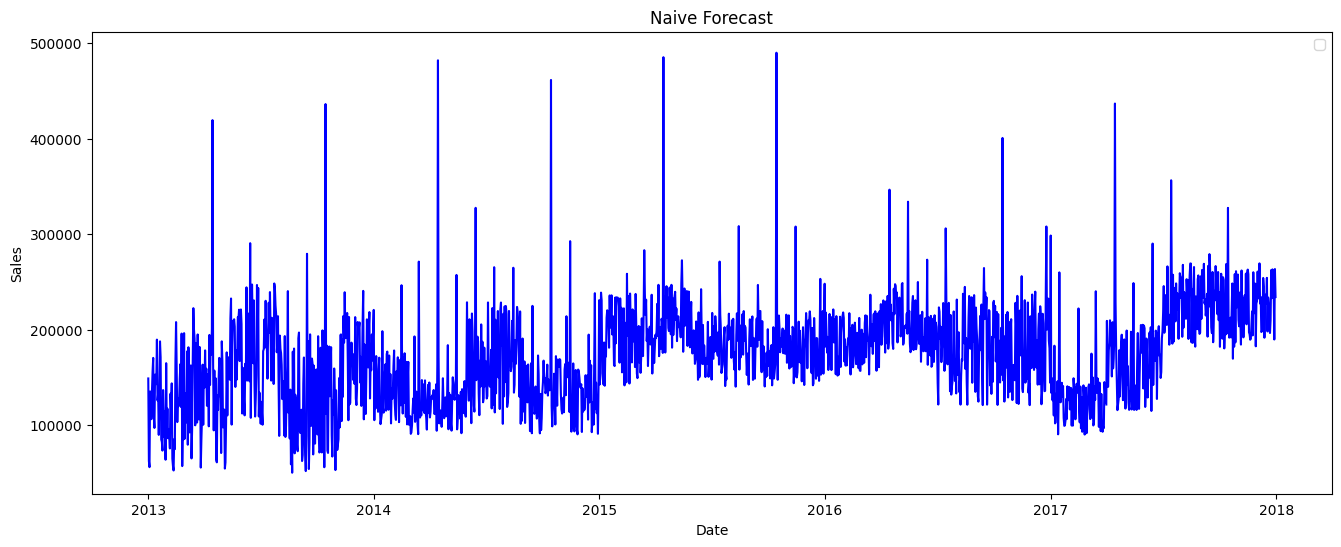

MAE: 50215.7200
MSE: 3819204402.9927
MAPE: 0.2533
R2: -0.9447


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("D:/Python/demand-prediction/Dataset/SKU3.csv")
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# Define target variable
y = df["sales"]

# Set the seasonal period for daily data with yearly seasonality
sp = 365  # daily data with yearly seasonality

# Train-Test Split
test_size = 275  # Define your test size
y_train = y[:-test_size]
y_test = y[-test_size:]

# Forecasting function for seasonal naive
def seasonal_naive_forecast(train_series, forecast_horizon, sp):
    """
    Creates a seasonal naive forecast by repeating the last season's values.
    
    Parameters:
        train_series (pd.Series): Training data series
        forecast_horizon (int): Number of periods to forecast
        sp (int): Seasonal period length
        
    Returns:
        np.array: Forecasted values
    """
    # Get the last season's values
    last_season = train_series[-sp:]
    
    # Repeat these values to cover the forecast horizon
    repeated_seasons = np.tile(last_season, int(np.ceil(forecast_horizon / sp)))[:forecast_horizon]
    
    return repeated_seasons

# Define forecast horizon
forecast_horizon = len(y_test)

# Generate forecast
y_pred = seasonal_naive_forecast(y_train, forecast_horizon, sp)

# Plot the results
plt.figure(figsize=(16, 6))
plt.plot(y_train.index, y_train, label="Training Data")
plt.plot(y_test.index, y_test, label="Test Data")
plt.plot(y_test.index, y_pred, label="Seasonal Naive Forecast", linestyle="--")
plt.legend()
plt.title("Naive Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Calculate and print performance metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R2: {r2:.4f}")
